# Maximum Points on a Line
 * From [leetcode](https://leetcode.com/problems/max-points-on-a-line/) 

Their phrasing is a bit unclear, but what they really want you to do is given a set of points determine the maximum of quantity of those points that could be on a single line, so we will operate under that assumption. 

Given $n$ points there are $ \sum_{x=2}^n {n \choose x} $ possible combinations of points that could form a line. That is to say you can choose any $x$ points where $x$ is between $2$ and $n$ and that could be a valid line so we need to check all of them. The good news is if you start from ${n \choose n}$ and work backwards the first one you encounter will be the solution. This will be the first brute force attempt at a solution.

## Sub-problems
1. Do any n points form a line?
    * Pick any 2 of the points and construct a line, $y = mx+b$ form
    * for the remainder plug in x and see if y matches, if any are not matches return false
    * else return true
    
2. What are the $ {n \choose x} $ for all $x$


## Edge Cases
1. Should return 0 on an empty list
2. Return 1 on a 1 element list
3. Duplicate points get included in the overall count

In [26]:
import itertools
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [27]:

class Solution:
    def maxPoints(self, points):
        n = len(points)
        if len(points) == 0:
            return 0
        elif len(points) == 1:
            return 1
        
        for i in range(n, 1, -1):
            combos = itertools.combinations(points, i)
            
            for c in combos:
                # special cases
                pointset = list(set([tuple(p) for p in c])) # deal with duplicates
                xset = set([p[0] for p in pointset])
                yset = set([p[1] for p in pointset])
                 # deal with duplicates
                if len(xset) == 1 or len(yset) == 1:
                    return len(c)
                elif len(xset) != len(pointset) or len(yset) != len(pointset):
                    continue
                
                if self.form_a_line(pointset):
                    return len(c)
                
        return 0
            
            
    def calc_slope(self, p1, p2):
        return (p2[1] - p1[1])/(p2[0] - p1[0])
    
    def calc_intercept(self, m, point):
        return point[1] - m*point[0]
    
    def on_a_line(self, m, b, point):
        if m * point[0] + b == point[1]:
            return True
        return False
            
    def form_a_line(self, sub_points):
        if len(sub_points) == 1:
            return True
        p1 = sub_points[0]
        p2 = sub_points[1]
        m = self.calc_slope(p1, p2)
        b = self.calc_intercept(m, p1)
        rest = sub_points[2:len(sub_points)]
        for p in rest:
            if not self.on_a_line(m, b, p):
                return False
        return True
        
            
points = [[0,9],[138,429],[115,359],[115,359],[-30,-102],[230,709],[-150,-686],[-135,-613],[-60,-248],[-161,-481],[207,639],[23,79],[-230,-691],[-115,-341],[92,289],[60,336],[-105,-467],[135,701],[-90,-394],[-184,-551],[150,774]]
s = Solution()
s.maxPoints(points)

        

11

This works but is ungodly slow. One instance where it does a lot of duplicate effort is if the same 3 points are part of multiple point sets but not part of a line those point sets still all get checked when we know automatically that they don't qualify. This sounds like a good opportunity for some dynamic programming. We could start with all 2 point lines, then for each of those find all valid 3 point lines by trying to add in the remaining points.

### Algorithm 2
* Create all 2-point lines
* for each line try adding another of each of the other points, if it is still a line keep it and mark that point as tried, if not discard it.
* for those point sets that are still lines repeat.

In [28]:
class Solution:
    def maxPoints(self, points):
        if len(points) == 1 or len(points) == 2 or len(points) == 0:
            return(len(points))
        lines = itertools.combinations(range(len(points)), 2)
        lines = [list(l) for l in lines]
        max_length = 2
        for i in range(len(lines)):
            for j in range(len(points)):
                if j in lines[i]:
                    continue
                # if the line and the point form a line add it and 
                possible_line_indices = lines[i] + [j]
                possible_line = [points[x] for x in possible_line_indices]

                if self.form_a_line(possible_line):
                    lines[i] = lines[i] + [j]
                    if len(lines[i]) > max_length:
                        max_length = len(lines[i])
            
        
        return max_length
            
            
    def calc_slope(self, p1, p2):
        return (p2[1] - p1[1])/(p2[0] - p1[0])
    
    def calc_intercept(self, m, point):
        return point[1] - m*point[0]
    
    def on_a_line(self, m, b, point):
        if m * point[0] + b == point[1]:
            return True
        return False
            
    def form_a_line(self, sub_points):
        if len(sub_points) == 1 or len(sub_points) == 2 or len(sub_points) == 0:
            return True
        pointset = list(set([tuple(p) for p in sub_points])) # deal with duplicates
        xset = set([p[0] for p in sub_points])
        yset = set([p[1] for p in sub_points])
        
        if len(xset) == 1 or len(yset) == 1:
            return True
        
        elif len(xset) != len(pointset) or len(yset) != len(pointset):
            return False
        
        if len(pointset) == 1 or len(pointset) == 2:
            return True
        
        p1 = sub_points[0]
        p2 = sub_points[1]
        try:
            m = self.calc_slope(p1, p2)
        except:
            return False
        b = self.calc_intercept(m, p1)
        rest = sub_points[2:len(sub_points) + 1]
        for p in rest:
            if not self.on_a_line(m, b, p):
                return False
        return True
        
points = [[0,9],[138,429],[115,359],[115,359],[-30,-102],[230,709],[-150,-686],[-135,-613],[-60,-248],[-161,-481],[207,639],[23,79],[-230,-691],[-115,-341],[92,289],[60,336],[-105,-467],[135,701],[-90,-394],[-184,-551],[150,774]]
#points = [[1,1],[2,2],[3,3]] #3
#points = [[1,1],[1,1],[1,1]] #3 - by definition
#points = [[3,1],[12,3],[3,1],[-6,-1]] # 4
#points = [[0,0],[0,0]] # 2 by definition
#points = [[-4,1],[-7,7],[-1,5],[9,-25]] # 3
#points = [[-1, 5], [9, -25], [-4, 1], [-7, 7]] 
#points = [[-54,-297],[-36,-222],[3,-2],[30,53],[-5,1],[-36,-222],[0,2],[1,3],[6,-47],[0,4],[2,3],[5,0],[48,128],[24,28],[0,-5],[48,128],[-12,-122],[-54,-297],[-42,-247],[-5,0],[2,4],[0,0],[54,153],[-30,-197],[4,5],[4,3],[-42,-247],[6,-47],[-60,-322],[-4,-2],[-18,-147],[6,-47],[60,178],[30,53],[-5,3],[-42,-247],[2,-2],[12,-22],[24,28],[0,-72],[3,-4],[-60,-322],[48,128],[0,-72],[-5,3],[5,5],[-24,-172],[-48,-272],[36,78],[-3,3]]
#points = [[0,0],[1,1],[1,-1]]
#points = [[0,0]]
s = Solution()

print(s.maxPoints(points))





12


In [29]:
p1 = points[0]
p2 = points[1]
m = s.calc_slope(p1, p2)
b = s.calc_intercept(m, p1)
s.form_a_line(points)

False

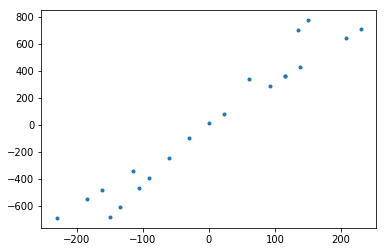

In [30]:

pts = np.array(points)
plt.figure()
plt.plot(pts[:,0], pts[:,1], '.')

# An Even better solution
For each pair of points calculate the slope and y intercept, store a count of those in an accumulator object and take the maximum this is approximiately ${n \choose 2}$ or approximately $n^2$. We need to get rid of duplicates before doing this.

In [60]:
class Solution:
    
    def calc_slope(self, p1, p2):
        """
        return slope as a tuple (dy, dx)
        """
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        gcd = math.gcd(dy, dx)
        dx = dx/gcd
        dy = dy/gcd
            # ensure if negative dy always stores that information
        if dx < 0:
            dy *= -1
            dx *= -1
        return (dy, dx) 
    
    def calc_intercept(self, p1, p2, m):
        """ 
        take two points and the slope as a tuple as provided by calc_slope and calcualte
        the y intercept, if there is no y intercept provide the x intercept instead
        """
        # if dx = 0
        if m[1] == 0:
            # return x intercept
            return p1[0]
        else:
            m_classic = m[0]/m[1]
            b = p1[1] - m_classic * p1[0] # solve for b in y = mx + b
            return b
            
    def calc_slope_intercept(self, p1, p2):
        slope = self.calc_slope(p1, p2)
        intercept = self.calc_intercept(p1, p2, slope)
        return slope, intercept
            
    def maxPoints(self, points):
        point_tuples = [tuple(p) for p in points]
        point_set = set(point_tuples)
        point_weight = {p: point_tuples.count(p) for p in point_set}
        two_point_lines = itertools.combinations(point_set, 2)
        lines = [list(l) for l in two_point_lines]
        max_length = max(point_weight)
        point_slope_accumulator = {}
        votes = {p:{} for p in point_set} # for each point/intercept a point belongs to it gets 1 vote
        for i in range(len(lines)):
            p1 = lines[i][0]
            p2 = lines[i][1]
            slope, intercept = self.calc_slope_intercept(p1, p2)
            for p in lines[i]
                if (slope, intercept) in votes[p]:
                    continue
                else:
                    votes[(slope, intercept)] = point_weight[p]

                
        
                
            
                
        print(point_slope_accumulator)
         
            
        return max_length 
    

            
            
points = [[0,9],[138,429],[115,359],[115,359],[-30,-102],[230,709],[-150,-686],[-135,-613],[-60,-248],[-161,-481],[207,639],[23,79],[-230,-691],[-115,-341],[92,289],[60,336],[-105,-467],[135,701],[-90,-394],[-184,-551],[150,774]]
points = [[0,0], [1,1], [2,2]]
points = [[0,0], [1,1], [1,2]]

s = Solution()
s.maxPoints(points)


TypeError: '>' not supported between instances of 'int' and 'tuple'